In [2]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('./PS-2025.1/Data/campeonatos_futebol_atualizacao.csv')
pd.set_option('display.max_columns', None)

In [18]:
df

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiro de meta 1,Tiro de meta 2,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2,Time Vencedor
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3,Glasgow Rangers
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2,Empate
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2,Empate
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1,Hearts
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1,Aberdeen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,2.0,1.0,0.0,0.0,29.0,7.0,15.0,14.0,4.0,0.0,1.0,3.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1,Blackburn
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,2.0,2.0,0.0,0.0,7.0,4.0,18.0,9.0,3.0,1.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2,Arsenal
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,2.0,0.0,0.0,0.0,17.0,8.0,14.0,14.0,7.0,0.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2,Manchester Utd
27714,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,2.0,0.0,0.0,0.0,5.0,13.0,9.0,3.0,1.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2,Empate


In [13]:
df['Time Vencedor'] = np.where(df['Gols 1'] > df['Gols 2'], df['Time 1'], np.where(df['Gols 1'] < df['Gols 2'], df['Time 2'], 'Empate'))

In [6]:
def encontraForm(formacoes,form):
  for i in range(30):
    if(formacoes[i] == form):
      return i
  return -1

In [23]:
formacoes = df['Position 1'].unique()
pos1 = 38
pos2 = 39
gols1 = 22
gols2 = 23

#matriz com um indice de quanto a formacao domina a outra
correlacao = np.full((30, 30), 0)

#matriz com a quantidade de vezes que o confronto foi jogado
#(partidas que so mudam qual formacao esta em casa ou fora sao contadas como partidas diferentes)
correlacao_qntd = np.full((30, 30), 0)

for i in range(len(df)):
    form1 = df.iloc[i, pos1]
    form2 = df.iloc[i, pos2]
    indice1 = encontraForm(formacoes, form1)
    indice2 = encontraForm(formacoes, form2)

    if indice1 == -1 or indice2 == -1:
        continue


    if df.iloc[i, gols1] > df.iloc[i, gols2]:
        correlacao[indice1, indice2] += 1
        correlacao_qntd[indice1, indice2] += 1
    elif df.iloc[i, gols1] < df.iloc[i, gols2]:
        correlacao[indice1, indice2] -= 1
        correlacao_qntd[indice1, indice2] += 1

resultado = np.divide(correlacao, correlacao_qntd, out=np.zeros_like(correlacao, dtype=float), where=correlacao_qntd != 0)


In [25]:
par_qntd = 30
par_taxa = 0.5
for i in range(30):
  for j in range(30):
    #parametros para detectar se uma formacao tem mt vantagem sobre outra
    if ((correlacao_qntd[i,j] > par_qntd) & (resultado[i,j] > par_taxa)):
      #printa os indices das formacoes no array, quais as formacoes, saldo de vitorias e qnt de partidas jogadas
      print(i,j)
      print(formacoes[i],formacoes[j])
      print(correlacao[i,j])
      print(correlacao_qntd[i,j])
      print("\n")

0 7
4-3-3 4-5-1
49
87


0 9
4-3-3 5-3-2
50
66


0 12
4-3-3 5-4-1
39
49


0 18
4-3-3 4-1-4-1
60
104


6 7
4-2-3-1 4-5-1
61
83


6 9
4-2-3-1 5-3-2
42
82


6 13
4-2-3-1 4-3-2-1
27
53


10 1
3-4-1-2 3-5-2
17
33




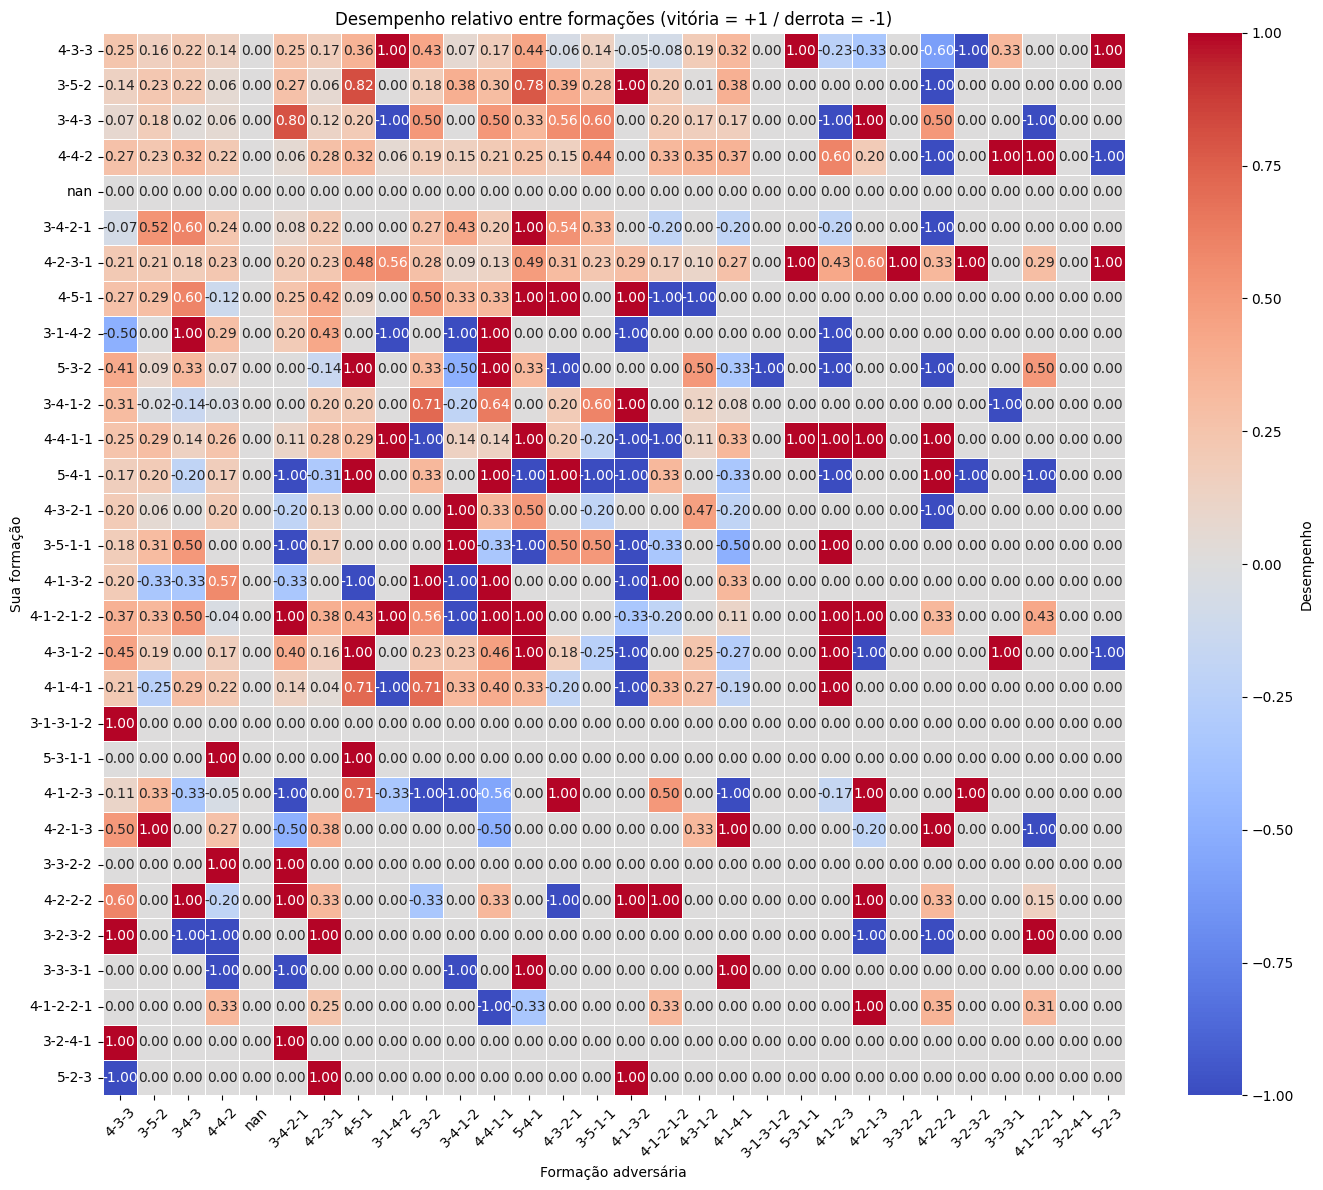

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria a figura
plt.figure(figsize=(14, 12))

# Cria o heatmap
sns.heatmap(
    resultado,                      # sua matriz final
    xticklabels=formacoes,         # nomes das colunas
    yticklabels=formacoes,         # nomes das linhas
    cmap="coolwarm",               # cores (pode testar outros: "viridis", "plasma", etc.)
    annot=True,                    # mostra os valores dentro das células
    fmt=".2f",                     # formatação dos números
    linewidths=0.5,                # linhas entre células
    cbar_kws={'label': 'Desempenho'}  # legenda da barra de cor
)

plt.xlabel("Formação adversária")
plt.ylabel("Sua formação")
plt.title("Desempenho relativo entre formações (vitória = +1 / derrota = -1)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

O que nos mostra que salvo raros casos, uma formação não possui vantagem significativa sobre outras, e a principal vantagem tem respeito a jogar em casa ou fora.

--------------------------------------------------------------------------------

In [10]:
times_df = pd.DataFrame(df['Time 1'].unique(), columns=['Time'])

#310 times unicos no total
times_casa = df['Time 1'].unique()
times_fora = df['Time 2'].unique()

times_df

,Time
0,Glasgow Rangers
1,Ross County
2,Dundee FC
3,Hearts
4,Aberdeen
...,...
305,Blackburn
306,Bolton
307,Birmingham
308,Blackpool


In [11]:
for i in range(len(times_casa)):
  if(times_casa[i] not in times_fora):
    print(times_casa[i])
#Mostra que todo time tem pelo menos um jogo em casa e fora

In [ ]:
#Analise sobre as medias de cada time A FAZER

## ------------------------------------------ Matriz de Correlacao ---------------

In [40]:
df_new = df.iloc[:,:-5]

corr_matrix = df_new.corr(method='pearson').round(2)

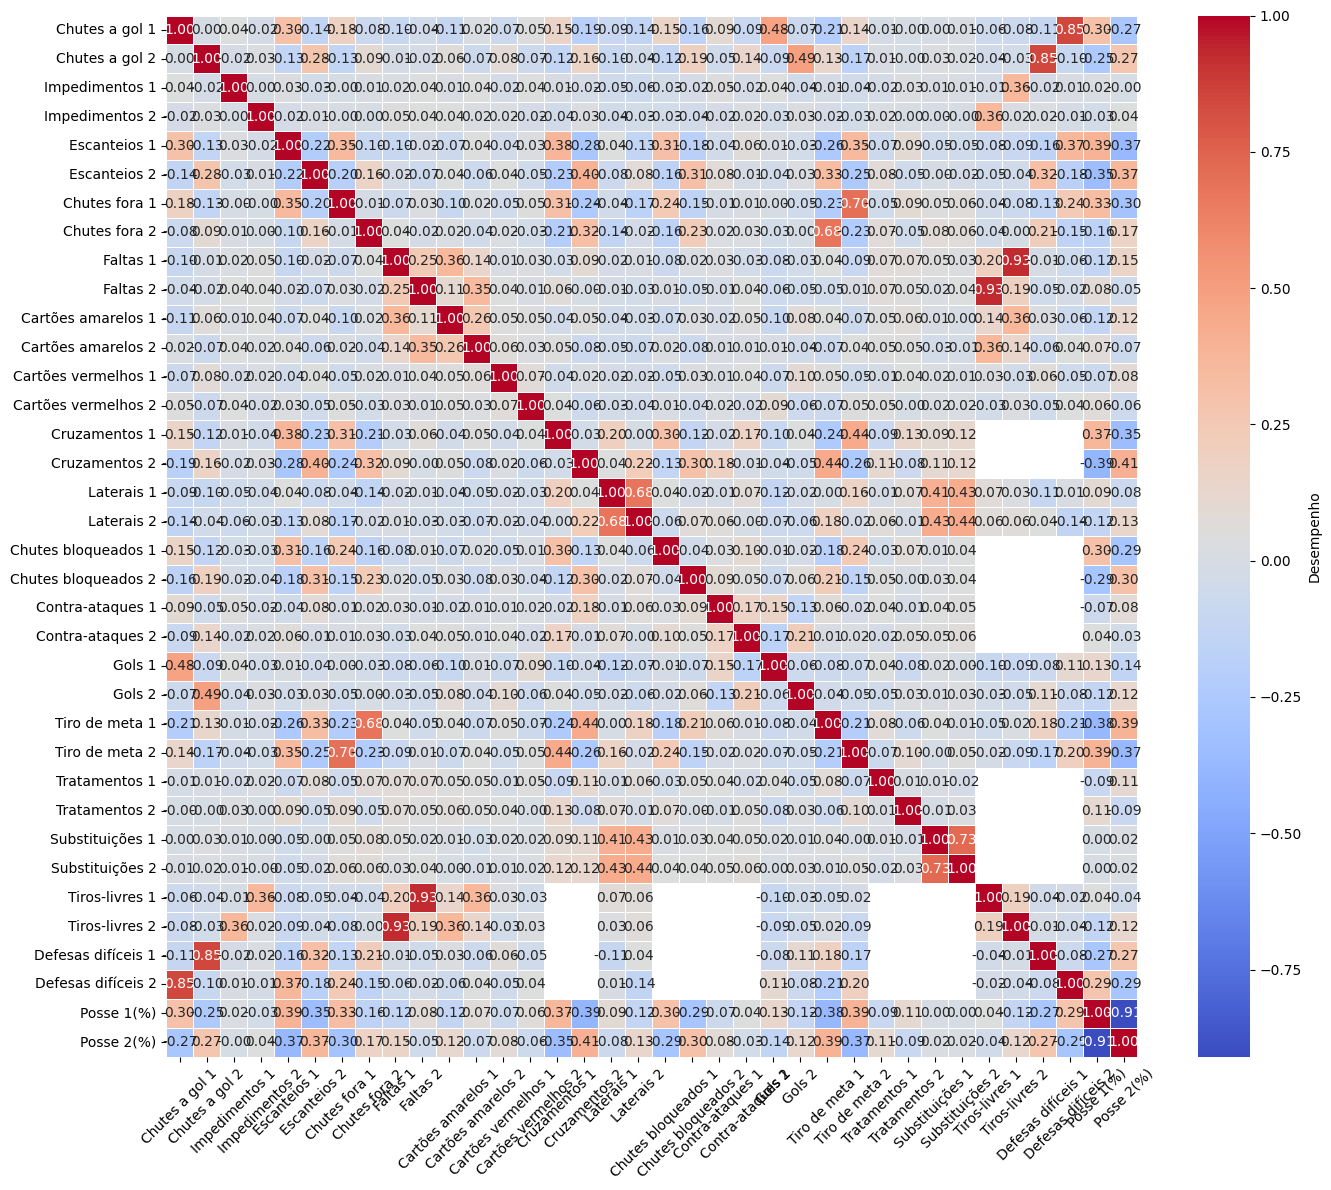

In [46]:
plt.figure(figsize=(14, 12))

sns.heatmap(
    corr_matrix,                      # sua matriz final
    xticklabels=df_new.columns,         # nomes das colunas
    yticklabels=df_new.columns,         # nomes das linhas
    cmap="coolwarm",               # cores (pode testar outros: "viridis", "plasma", etc.)
    annot=True,                    # mostra os valores dentro das células
    fmt=".2f",                     # formatação dos números
    linewidths=0.5,                # linhas entre células
    cbar_kws={'label': 'Desempenho'}  # legenda da barra de cor
)


plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
for row in range(len(corr_matrix)):
  for col in range(len(corr_matrix.columns)):
    if (row == col):
      continue
    if (corr_matrix.iloc[row,col] > 0.5):
      print(corr_matrix.columns[row],corr_matrix.columns[col])
      print(corr_matrix.iloc[row,col])
      print("\n")
    if (corr_matrix.iloc[row,col] < -0.5):
      print(corr_matrix.columns[row],corr_matrix.columns[col])
      print(corr_matrix.iloc[row,col])
      print("\n")

Chutes a gol 1 Defesas difíceis 2
0.85


Chutes a gol 2 Defesas difíceis 1
0.85


Chutes fora 1 Tiro de meta 2
0.7


Chutes fora 2 Tiro de meta 1
0.68


Faltas 1 Tiros-livres 2
0.93


Faltas 2 Tiros-livres 1
0.93


Laterais 1 Laterais 2
0.68


Laterais 2 Laterais 1
0.68


Tiro de meta 1 Chutes fora 2
0.68


Tiro de meta 2 Chutes fora 1
0.7


Substituições 1 Substituições 2
0.73


Substituições 2 Substituições 1
0.73


Tiros-livres 1 Faltas 2
0.93


Tiros-livres 2 Faltas 1
0.93


Defesas difíceis 1 Chutes a gol 2
0.85


Defesas difíceis 2 Chutes a gol 1
0.85


Posse 1(%) Posse 2(%)
-0.91


Posse 2(%) Posse 1(%)
-0.91


